In [149]:
import pandas as pd
import os
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
candidates={'2016':('Trump','Hillary'),'2012':('Romney','Obama'),
            '2008':('McCain','Obama'),'2004':('Bush','Kerry'),'2000':('Bush','Gore')}

In [151]:
yr=input('year of interest: ')

year of interest: 2008


In [ ]:
###creating unmodified tables

In [152]:
df=pd.read_pickle(f'files/table{yr}.pkl')
unmodified=df

In [153]:
cols=df.columns
cols

Index(['year', 'state', 'county', 'GeoFips', 'candidate', 'party',
       'candidatevotes', 'totalvotes', 'num_jobs', 'Farm_income_thousands',
       'Income/Capita', 'population', 'avg_sal', 'labor_Force', 'Employed',
       'Unemployed', 'Unemployment_Rate'],
      dtype='object')

In [154]:
df=df.drop(labels=['Employed', 'Unemployed','year','county','candidate','GeoFips'],axis=1)

In [155]:
df.columns

Index(['state', 'party', 'candidatevotes', 'totalvotes', 'num_jobs',
       'Farm_income_thousands', 'Income/Capita', 'population', 'avg_sal',
       'labor_Force', 'Unemployment_Rate'],
      dtype='object')

In [156]:
#demographic accuracy check on data
#checking for loss

In [157]:
#arbitrary split
# dft=df[df['party']=='republican']

In [158]:
# dft['population'].sum()
# lost ~6mil

In [159]:
# income/capita and avg_sal was found to be different despite mild relation
# df['ISdiff']=df['Income/Capita']-df['avg_sal']

In [160]:
#drop more useless columns
#which columns are related to each other?
##Employed, Unemployed, Unemployment_Rate, labor_Force
##Income/Capita, avg_sal (mild relation)
#STAY
## Farm_income_thousands, Income/Capita, population, avg_sal, labor_Force, Unemployment_Rate
#GO
##total_personal_income_thous, Employed, Unemployed

In [161]:
# no alaska
# dft['state'].unique()

In [162]:
# tested some defiations by state
# s=dft.groupby(by=['state']).sum()

In [163]:
#proceceed assuming loss is acceptable

In [164]:
#create vote share and drop others
df['share_vote']=df['candidatevotes']/df['totalvotes']
df=df.drop(labels=['candidatevotes','totalvotes'], axis=1)

In [165]:
#split by candidate

In [166]:
dfR=df[df['party']=='republican']

In [167]:
dfD=df[df['party']=='democrat']

In [168]:
df.columns

Index(['state', 'party', 'num_jobs', 'Farm_income_thousands', 'Income/Capita',
       'population', 'avg_sal', 'labor_Force', 'Unemployment_Rate',
       'share_vote'],
      dtype='object')

In [169]:
# #print view
# for x in df.columns[###]:
#     t=stats.pearsonr(df16T['share_vote'], df16T[x])
#     h=stats.pearsonr(df16H['share_vote'], df16H[x])
#     print(f'the pearson corr and p-val for Tvotes and {x} is {t}')
#     print(f'the pearson corr and p-val for Hvotes and {x} is {h}')

In [170]:
#creating dataframes for each candidate
rep=[]
dem=[]
for x in df.columns[2:-1]:
    t=stats.pearsonr(dfR['share_vote'], dfR[x])
    rep.append([t[0],t[1],x])
    h=stats.pearsonr(dfD['share_vote'], dfD[x])
    dem.append([h[0],h[1],x])

In [171]:
dfr=pd.DataFrame(rep)
dfr=dfr.rename(columns={0:'corr',1:'p',2:'var'})
dfr.set_index('var',inplace=True)

In [172]:
dfd=pd.DataFrame(dem)
dfd=dfd.rename(columns={0:'corr',1:'p',2:'var'})
dfd.set_index('var',inplace=True)

In [173]:
#some degree of certainty for p-value
dfr.sort_values(by='corr')

,corr,p
var,,
Unemployment_Rate,-0.294129,7.583718e-62
avg_sal,-0.282589,4.961444e-57
num_jobs,-0.265951,1.760713e-50
labor_Force,-0.259285,5.523189e-48
population,-0.256864,4.279338e-47
Income/Capita,-0.143986,1.404894e-15
Farm_income_thousands,-0.097597,6.771326e-08


In [174]:
dfd.sort_values(by='corr')

,corr,p
var,,
Farm_income_thousands,0.094682,1.648332e-07
Income/Capita,0.146131,5.261284e-16
population,0.262670,3.043323e-49
labor_Force,0.264878,4.489412e-50
num_jobs,0.271457,1.344749e-52
avg_sal,0.291243,1.275247e-60
Unemployment_Rate,0.294674,4.435829e-62


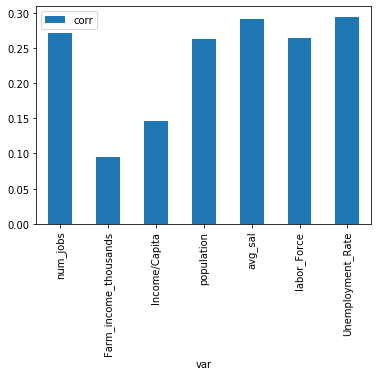

In [175]:
#basic plots of correls
dfd.plot(kind='bar', use_index=True, y='corr')

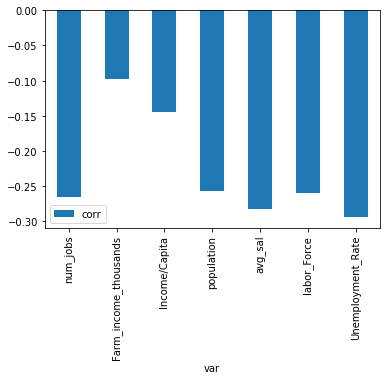

In [176]:
dfr.plot(kind='bar',use_index=True,y='corr')

In [135]:
dfR.corr()

,num_jobs,Farm_income_thousands,Income/Capita,population,avg_sal,labor_Force,Unemployment_Rate,share_vote
num_jobs,1.000000,0.155249,0.309075,0.971440,0.403071,0.978019,-0.059344,-0.359901
Farm_income_thousands,0.155249,1.000000,0.084952,0.188306,0.184710,0.179188,0.071219,-0.122305
Income/Capita,0.309075,0.084952,1.000000,0.252328,0.575896,0.271631,-0.417103,-0.245794
population,0.971440,0.188306,0.252328,1.000000,0.362479,0.998123,-0.041989,-0.354568
avg_sal,0.403071,0.184710,0.575896,0.362479,1.000000,0.374612,-0.153298,-0.375367
labor_Force,0.978019,0.179188,0.271631,0.998123,0.374612,1.000000,-0.055454,-0.359370
Unemployment_Rate,-0.059344,0.071219,-0.417103,-0.041989,-0.153298,-0.055454,1.000000,-0.114435
share_vote,-0.359901,-0.122305,-0.245794,-0.354568,-0.375367,-0.359370,-0.114435,1.000000


In [136]:
dfD.corr()

,num_jobs,Farm_income_thousands,Income/Capita,population,avg_sal,labor_Force,Unemployment_Rate,share_vote
num_jobs,1.000000,0.155249,0.309075,0.971440,0.403071,0.978019,-0.059344,0.362020
Farm_income_thousands,0.155249,1.000000,0.084952,0.188306,0.184710,0.179188,0.071219,0.107341
Income/Capita,0.309075,0.084952,1.000000,0.252328,0.575896,0.271631,-0.417103,0.208559
population,0.971440,0.188306,0.252328,1.000000,0.362479,0.998123,-0.041989,0.357344
avg_sal,0.403071,0.184710,0.575896,0.362479,1.000000,0.374612,-0.153298,0.350103
labor_Force,0.978019,0.179188,0.271631,0.998123,0.374612,1.000000,-0.055454,0.361131
Unemployment_Rate,-0.059344,0.071219,-0.417103,-0.041989,-0.153298,-0.055454,1.000000,0.175918
share_vote,0.362020,0.107341,0.208559,0.357344,0.350103,0.361131,0.175918,1.000000


In [137]:
# pd.plotting.scatter_matrix(dfR,figsize=(15,15))
# plt.show()

In [138]:
# pd.plotting.scatter_matrix(dfD,figsize=(15,15))
# plt.show()

In [139]:
dfr.to_pickle(f'files/Rcorr{candidates[yr][0]}{yr[2:]}.pkl')

In [140]:
dfd.to_pickle(f'files/Dcorr{candidates[yr][1]}{yr[2:]}.pkl')

In [177]:
dfR[dfR['share_vote']>.5]['Unemployment_Rate'].describe()

count    2138.000000
mean        5.608934
std         1.951971
min         1.300000
25%         4.100000
50%         5.500000
75%         6.800000
max        16.000000
Name: Unemployment_Rate, dtype: float64

In [178]:
dfD[dfD['share_vote']>.5]['Unemployment_Rate'].describe()

count    775.000000
mean       6.313935
std        2.156580
min        2.100000
25%        4.800000
50%        5.900000
75%        7.400000
max       22.600000
Name: Unemployment_Rate, dtype: float64

In [144]:
dfD.count()

state                    3046
party                    3046
num_jobs                 3046
Farm_income_thousands    3046
Income/Capita            3046
population               3046
avg_sal                  3046
labor_Force              3046
Unemployment_Rate        3046
share_vote               3046
dtype: int64